In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.optimize import minimize
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

In [3]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def RMSE(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def SMAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))) * 200


In [4]:
def lin_fun(x):
    return 2 * x + 1

Text(0.5, 1.0, 'Linear Function with Noise')

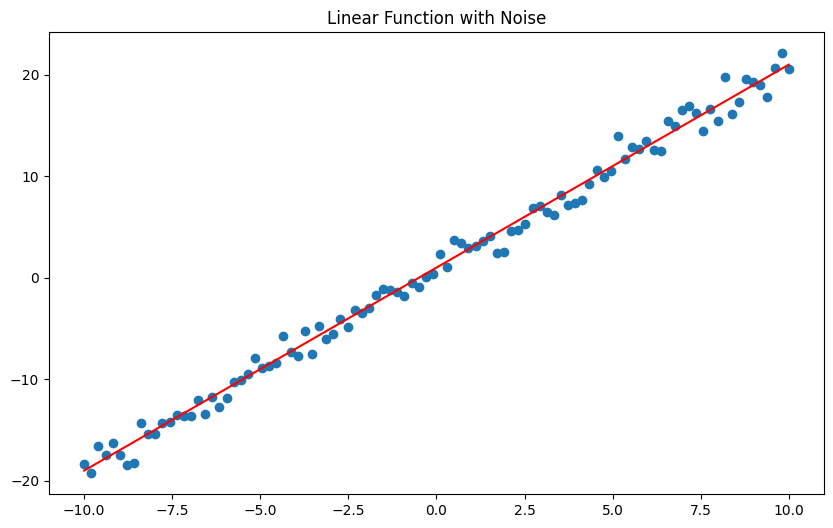

In [5]:
X = np.linspace(-10, 10, 100)

y = lin_fun(X) + np.random.normal(0, 1, X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Data')
plt.plot(X, lin_fun(X), label='True function', color='red')
plt.title('Linear Function with Noise')

In [6]:
weights = np.zeros(y.shape[0])

for i in range(30):
    weights[i] = 1000000000

weights = weights / np.sum(weights)

chosen_indices = np.random.choice(y.shape[0], 20, replace=False, p=weights)
print("Chosen indices:", chosen_indices)
y[chosen_indices] += np.random.randn(20) * 15


Chosen indices: [12 28 15  6  1 25 24 22 19  3  4  7  0 17 16  2 11 18 21 23]


Text(0.5, 1.0, 'Linear Function with Noise')

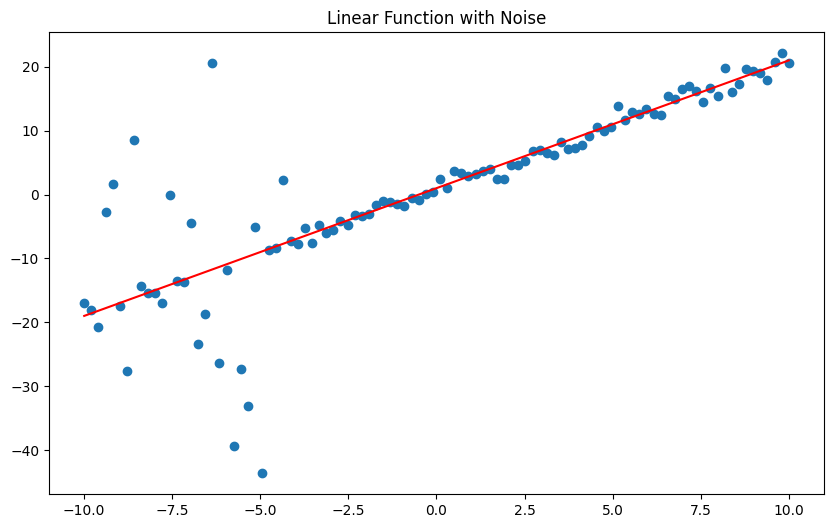

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Data')
plt.plot(X, lin_fun(X), label='True function', color='red')
plt.title('Linear Function with Noise')

In [8]:
def loss_function_MAE(params):
    a, b = params
    y_pred = a * X + b
    return MAE(y, y_pred)


def loss_function_MSE(params):
    a, b = params
    y_pred = a * X + b
    return MSE(y, y_pred)

def loss_function_RMSE(params):
    a, b = params
    y_pred = a * X + b
    return RMSE(y, y_pred)


def loss_function_MAPE(params):
    a, b = params
    y_pred = a * X + b
    return MAPE(y, y_pred)


def loss_function_SMAPE(params):
    a, b = params
    y_pred = a * X + b
    return SMAPE(y, y_pred)


Loss function: MAE, Predicted value: 2.0214 * X + 0.8966. Loss value: 3.4623


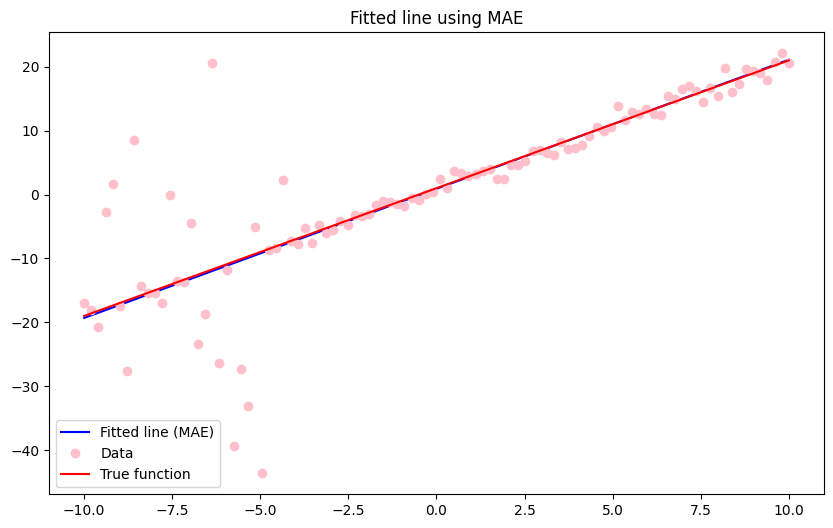

Loss function: MSE, Predicted value: 1.9746 * X + 0.6882. Loss value: 61.1829


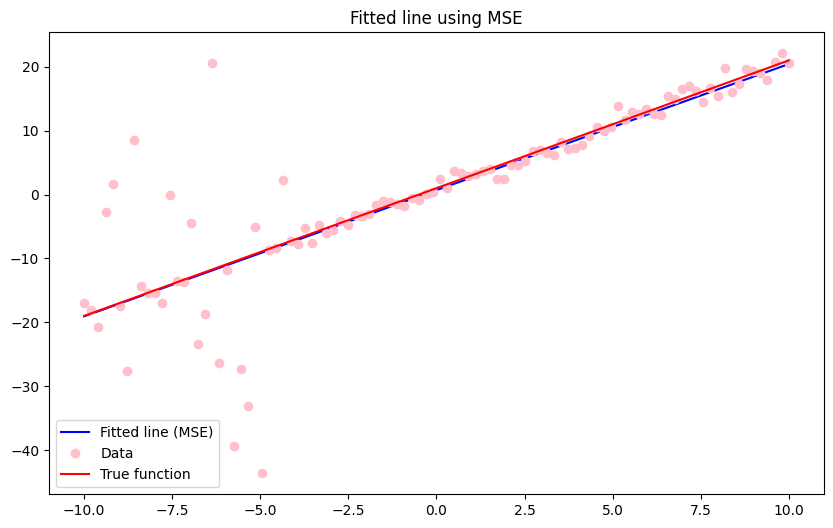

Loss function: RMSE, Predicted value: 1.9746 * X + 0.6882. Loss value: 7.8219


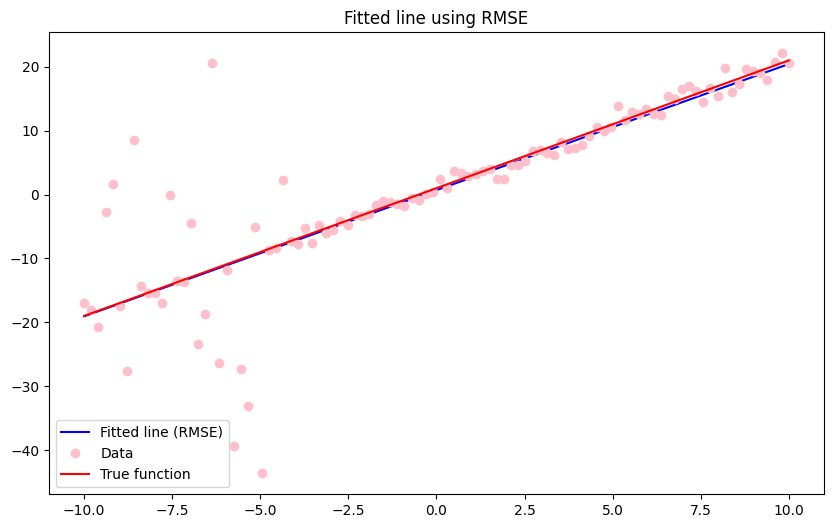

Loss function: MAPE, Predicted value: 0.0149 * X + 0.0358. Loss value: 97.3647%


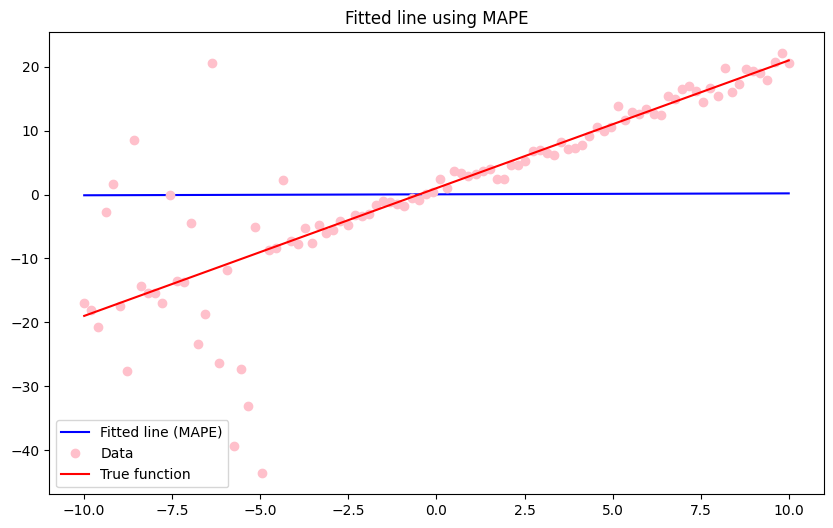

Loss function: SMAPE, Predicted value: 1.9966 * X + 0.6363. Loss value: 32.5752%


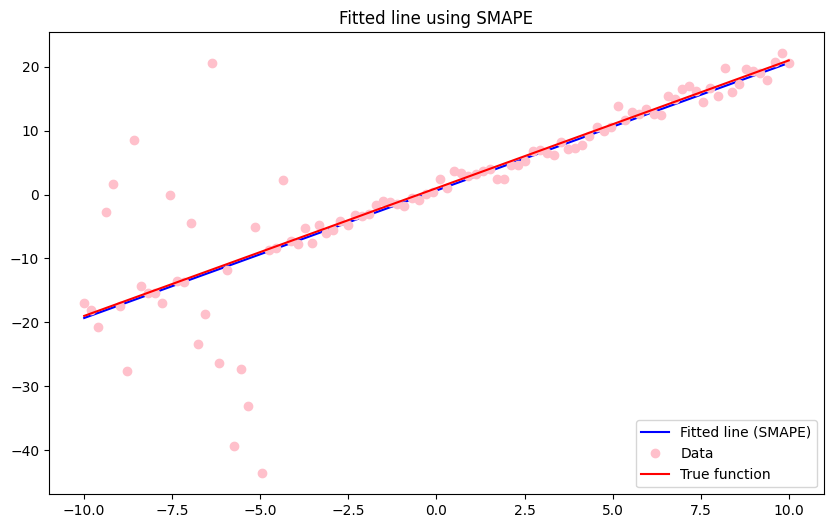

In [9]:
loss_functions = {
    'MAE': loss_function_MAE,
    'MSE': loss_function_MSE,
    'RMSE': loss_function_RMSE,
    'MAPE': loss_function_MAPE,
    'SMAPE': loss_function_SMAPE
}

initial_params = np.array([0.0, 0.0])


for name, func in loss_functions.items():
    minimizer = minimize(func, initial_params, method='Nelder-Mead')
    pred_a, pred_b = minimizer.x
    loss_value = func(minimizer.x)
    if name == "MAPE" or name == "SMAPE":
        print(f"Loss function: {name}, Predicted value: {pred_a:.4f} * X + {pred_b:.4f}. Loss value: {loss_value:.4f}%")
    else:
        print(f"Loss function: {name}, Predicted value: {pred_a:.4f} * X + {pred_b:.4f}. Loss value: {loss_value:.4f}")
    plt.figure(figsize=(10, 6))
    plt.plot(X, pred_a * X + pred_b, label=f'Fitted line ({name})', color = 'blue')
    plt.plot(X, y, 'o', label='Data', color = 'pink')
    plt.plot(X, lin_fun(X), label='True function', color='red')
    plt.title(f'Fitted line using {name}')
    plt.legend()
    plt.show()


In [10]:
data = load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names
X = pd.DataFrame(X, columns=feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = MSE(y_test, y_pred)
    return mse


+-----------------------------------------+---------+
| Model                                   |     MSE |
+=========================================+=========+
| ElasticNet (alpha=0.00, l1_ratio=0.50)  | 2939.04 |
+-----------------------------------------+---------+
| ElasticNet (alpha=0.00, l1_ratio=0.33)  | 3139.01 |
+-----------------------------------------+---------+
| ElasticNet (alpha=0.00, l1_ratio=0.19)  | 3138.57 |
+-----------------------------------------+---------+
| ElasticNet (alpha=0.00, l1_ratio=0.10)  | 3138.35 |
+-----------------------------------------+---------+
| ElasticNet (alpha=0.00, l1_ratio=0.05)  | 3138.25 |
+-----------------------------------------+---------+
| ElasticNet (alpha=0.00, l1_ratio=0.03)  | 3138.2  |
+-----------------------------------------+---------+
| ElasticNet (alpha=0.00, l1_ratio=0.01)  | 3138.18 |
+-----------------------------------------+---------+
| ElasticNet (alpha=0.00, l1_ratio=0.00)  | 3138.16 |
+---------------------------

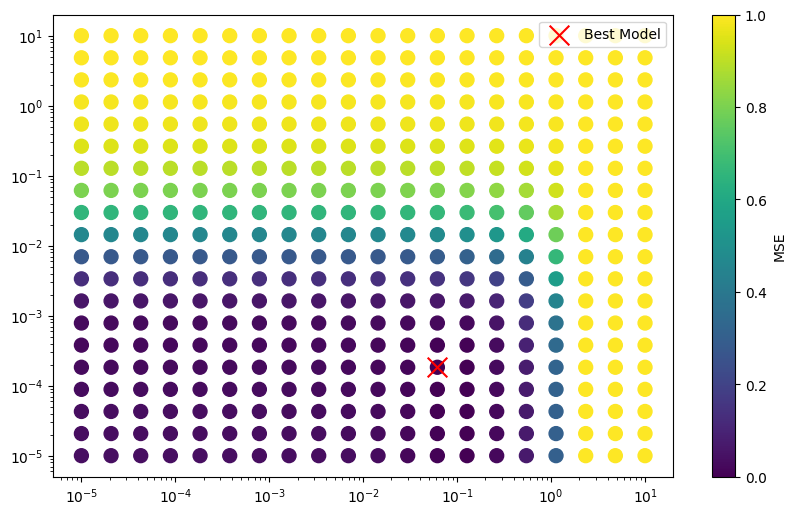

In [37]:
lambdas1 = np.logspace(-5, 1, 20)
lambdas2 = np.logspace(-5, 1, 20)

coefs = []
mse_results = {}
models = {}
to_plot = []


for lambda1 in lambdas1:
    for lambda2 in lambdas2:
        alpha = lambda1 + lambda2
        l1_ratio = lambda1 / (lambda1 + lambda2)
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        mse = train_and_evaluate(model, X_train, y_train, X_test, y_test)
        to_plot.append({'lambda1': lambda1, 'lambda2': lambda2, 'MSE': mse})
        models[f'ElasticNet (alpha={alpha:.2f}, l1_ratio={l1_ratio:2f})'] = model
        coefs.append(model.coef_)
        mse_results[f'ElasticNet (alpha={alpha:.2f}, l1_ratio={l1_ratio:.2f})'] = mse

to_plot = pd.DataFrame(to_plot)
        

print(tabulate(mse_results.items(), headers=['Model', 'MSE'], tablefmt='grid'))

best_model = min(mse_results, key=mse_results.get)
# Get the best lambda1 and lambda2 from the to_plot DataFrame
best_lambda1 = to_plot.loc[to_plot['MSE'] == mse_results[best_model], 'lambda1'].values[0]
best_lambda2 = to_plot.loc[to_plot['MSE'] == mse_results[best_model], 'lambda2'].values[0]
best_mse = mse_results[best_model]

print(f"Best model: {best_model} with MSE: {best_mse:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(to_plot['lambda1'], to_plot['lambda2'], c=to_plot['MSE'], cmap='viridis', s=100)
plt.scatter(best_lambda1, best_lambda2, s=200, c='red', marker='x', label='Best Model')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.colorbar(label='MSE')